In [120]:
from matplotlib import dates
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

import yfinance as yf

##  Load data

In [121]:
raw = yf.download('SPY AAPL', start= '2010-01-01' , end = '2022-12-31')

[*********************100%%**********************]  2 of 2 completed


In [122]:
raw

Adj Close                   Close                    High  \
                  AAPL         SPY        AAPL         SPY        AAPL   
Date                                                                     
2010-01-04    6.478998   87.129951    7.643214  113.330002    7.660714   
2010-01-05    6.490200   87.360565    7.656429  113.629997    7.699643   
2010-01-06    6.386963   87.422104    7.534643  113.709999    7.686786   
2010-01-07    6.375156   87.791122    7.520714  114.190002    7.571429   
2010-01-08    6.417542   88.083260    7.570714  114.570000    7.571429   
...                ...         ...         ...         ...         ...   
2022-12-23  131.127045  377.177399  131.860001  382.910004  132.419998   
2022-12-27  129.307251  375.690033  130.029999  381.399994  131.410004   
2022-12-28  125.339417  371.020966  126.040001  376.660004  131.029999   
2022-12-29  128.889572  377.699463  129.610001  383.440002  130.479996   
2022-12-30  129.207794  376.704620  129.929993  382.429993  129.949997   

                               Low                    Open              \
                   SPY        AAPL         SPY        AAPL         SPY   
Date                                                                     
2010-01-04  113.389999    7.585000  111.510002    7.622500  112.370003   
2010-01-05  113.680000    7.616071  112.849998    7.664286  113.260002   
2010-01-06  113.989998    7.526786  113.430000    7.656429  113.519997   
2010-01-07  114.330002    7.466071  113.180000    7.562500  113.500000   
2010-01-08  114.620003    7.466429  113.660004    7.510714  113.889999   
...                ...         ...         ...         ...         ...   
2022-12-23  383.059998  129.639999  378.029999  130.919998  379.649994   
2022-12-27  383.149994  128.720001  379.649994  131.380005  382.790009   
2022-12-28  383.390015  125.870003  376.420013  129.669998  381.329987   
2022-12-29  384.350006  127.730003  379.079987  127.989998  379.630005   
2022-12-30  382.579987  127.430000  378.429993  128.410004  380.640015   

               Volume             
                 AAPL        SPY  
Date                              
2010-01-04  493729600  118944600  
2010-01-05  601904800  111579900  
2010-01-06  552160000  116074400  
2010-01-07  477131200  131091100  
2010-01-08  447610800  126402800  
...               ...        ...  
2022-12-23   63814900   59857300  
2022-12-27   69007800   51638200  
2022-12-28   85438400   70911500  
2022-12-29   75703700   66970900  
2022-12-30   77034200   84022200  

[3272 rows x 12 columns]

In [123]:
raw.pipe? # Documentation for pipe()

SyntaxError: invalid syntax (3732142636.py, line 1)

In [ ]:
raw.columns 

MultiIndex([('Adj Close', 'AAPL'),
            ('Adj Close',  'SPY'),
            (    'Close', 'AAPL'),
            (    'Close',  'SPY'),
            (     'High', 'AAPL'),
            (     'High',  'SPY'),
            (      'Low', 'AAPL'),
            (      'Low',  'SPY'),
            (     'Open', 'AAPL'),
            (     'Open',  'SPY'),
            (   'Volume', 'AAPL'),
            (   'Volume',  'SPY')],
           )

In [ ]:
def fix_cols(df):
    columns = df.columns
    outer = [col[0] for col in columns]
    df.columns = outer
    return df

(raw
.iloc[:, ::2]
.pipe(fix_cols)
)

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2010-01-04,6.478998,7.643214,7.660714,7.585000,7.622500,493729600
2010-01-05,6.490200,7.656429,7.699643,7.616071,7.664286,601904800
2010-01-06,6.386963,7.534643,7.686786,7.526786,7.656429,552160000
2010-01-07,6.375156,7.520714,7.571429,7.466071,7.562500,477131200
2010-01-08,6.417542,7.570714,7.571429,7.466429,7.510714,447610800
...,...,...,...,...,...,...
2022-12-23,131.127045,131.860001,132.419998,129.639999,130.919998,63814900
2022-12-27,129.307251,130.029999,131.410004,128.720001,131.380005,69007800
2022-12-28,125.339417,126.040001,131.029999,125.870003,129.669998,85438400


### Sample code to understand the iloc[: , ::2] syntax

In [ ]:

import pandas as pd

# Create a sample DataFrame
data = {
    'A': [1, 2, 3, 4],
    'B': [5, 6, 7, 8],
    'C': [9, 10, 11, 12],
    'D': [13, 14, 15, 16]
}

df = pd.DataFrame(data)

# # Select every second column using iloc[:, ::2]
result = df.iloc[:, ::2]

print(result)

# df


   A   C
0  1   9
1  2  10
2  3  11
3  4  12


### Let's use the fix_col and use new function called tweak_data together

In [ ]:


# In this we have the previous function  named fix_cols
def fix_cols(df):
    columns = df.columns
    outer = [col[0] for col in columns]
    df.columns = outer
    return df

# we define a new function called tweak_data and download the data and return it using iloc[:, ::2] 
# the iloc[:,::2] will go to each second column in the DataFrame and pipe will make it into sequential 
def tweak_data():
    raw = yf.download('SPY AAPL', start= '2010-01-01' , end = '2022-12-31')
    
    return (raw
            .iloc[:, ::2]
            .pipe(fix_cols)
            )

    

tweak_data()

[*********************100%%**********************]  2 of 2 completed


,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2010-01-04,6.478998,7.643214,7.660714,7.585000,7.622500,493729600
2010-01-05,6.490200,7.656429,7.699643,7.616071,7.664286,601904800
2010-01-06,6.386963,7.534643,7.686786,7.526786,7.656429,552160000
2010-01-07,6.375156,7.520714,7.571429,7.466071,7.562500,477131200
2010-01-08,6.417542,7.570714,7.571429,7.466429,7.510714,447610800
...,...,...,...,...,...,...
2022-12-23,131.127045,131.860001,132.419998,129.639999,130.919998,63814900
2022-12-27,129.307251,130.029999,131.410004,128.720001,131.380005,69007800
2022-12-28,125.339417,126.040001,131.029999,125.870003,129.669998,85438400


<Axes: xlabel='Date'>

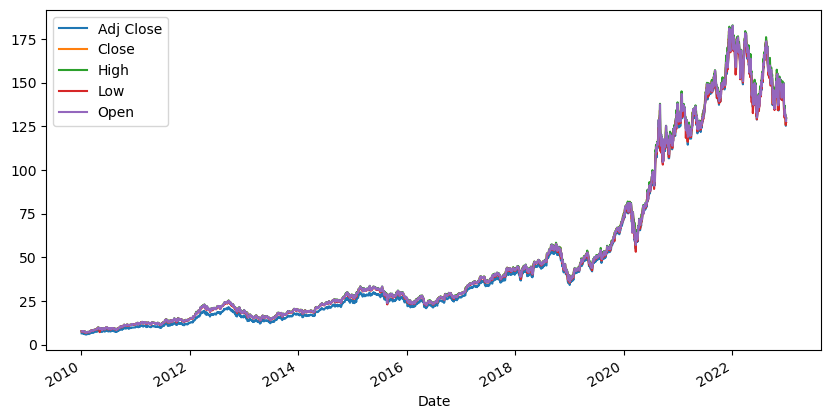

In [ ]:


(raw
.iloc[:, :-2:2]
.pipe(fix_cols)
.plot(figsize=(10, 5))
)


<Axes: xlabel='Date'>

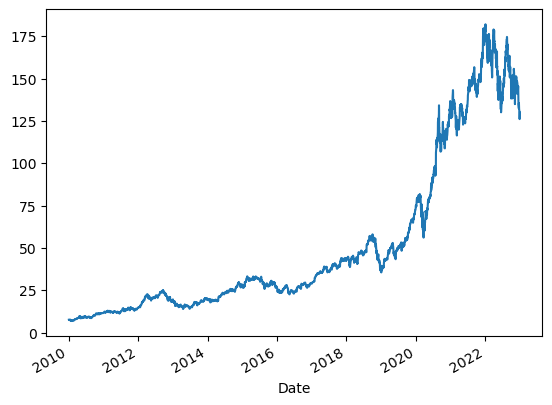

In [ ]:
(raw
.iloc[:, :-2:2]
.pipe(fix_cols)
.Close
.plot()
)


<Axes: xlabel='Date'>

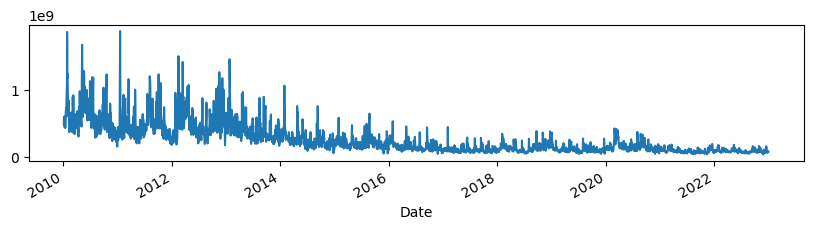

In [ ]:
(raw
.iloc[:, ::2]
.pipe(fix_cols)
.Volume
.plot(figsize=(10, 2))
)

In [ ]:
(
raw
.iloc[:, ::2]
.pipe(fix_cols)
.Close
)

Date
2010-01-04      7.643214
2010-01-05      7.656429
2010-01-06      7.534643
2010-01-07      7.520714
2010-01-08      7.570714
                 ...    
2022-12-23    131.860001
2022-12-27    130.029999
2022-12-28    126.040001
2022-12-29    129.610001
2022-12-30    129.929993
Name: Close, Length: 3272, dtype: float64

In [ ]:
(
raw
.iloc[:, ::2]
.pipe(fix_cols)
.resample('M') # Offset Alias
.Close
)

In [ ]:
(
raw
.iloc[:, ::2]
.pipe(fix_cols)
.resample('M') # Offset Alias
.Close
.mean()
)

Date
2010-01-31      7.418402
2010-02-28      7.099850
2010-03-31      7.978960
2010-04-30      8.969592
2010-05-31      8.980768
                 ...    
2022-08-31    166.885218
2022-09-30    153.002856
2022-10-31    145.013333
2022-11-30    145.843331
2022-12-31    137.876666
Freq: M, Name: Close, Length: 156, dtype: float64

<Axes: xlabel='Date'>

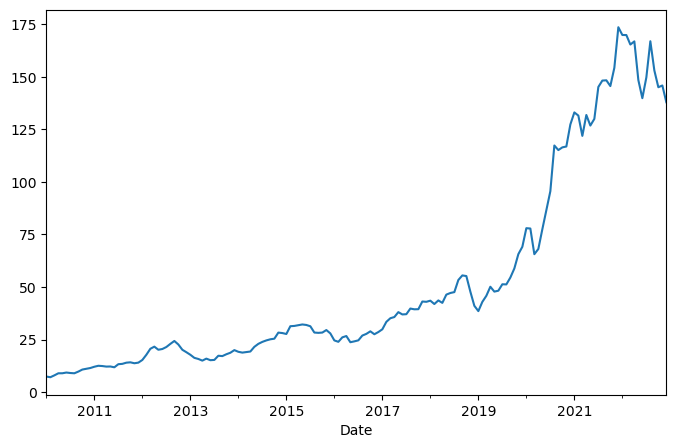

In [ ]:
(
raw
.iloc[:, ::2]
.pipe(fix_cols)
.resample('M') # Offset Alias
.Close
.mean()
.plot(figsize=(8, 5))
)

In [ ]:
(
raw
.iloc[:, ::2]
.pipe(fix_cols)
.resample('d')
.agg({'Open': 'first' , 'High' : 'max', 'Low' :'min', 'Close' :'last'})
.loc['jan 2020' : 'jun 2020']
)

,Open,High,Low,Close
Date,,,,
2020-01-01,NaN,NaN,NaN,NaN
2020-01-02,74.059998,75.150002,73.797501,75.087502
2020-01-03,74.287498,75.144997,74.125000,74.357498
2020-01-04,NaN,NaN,NaN,NaN
2020-01-05,NaN,NaN,NaN,NaN
...,...,...,...,...
2020-06-26,91.102501,91.330002,88.254997,88.407501
2020-06-27,NaN,NaN,NaN,NaN
2020-06-28,NaN,NaN,NaN,NaN


## Let's create  a Candlestick Chart to understand the dataFrame

,Open,High,Low,Close
Date,,,,
2020-01-01,NaN,NaN,NaN,NaN
2020-01-02,74.059998,75.150002,73.797501,75.087502
2020-01-03,74.287498,75.144997,74.125000,74.357498
2020-01-04,NaN,NaN,NaN,NaN
2020-01-05,NaN,NaN,NaN,NaN
...,...,...,...,...
2020-06-26,91.102501,91.330002,88.254997,88.407501
2020-06-27,NaN,NaN,NaN,NaN
2020-06-28,NaN,NaN,NaN,NaN


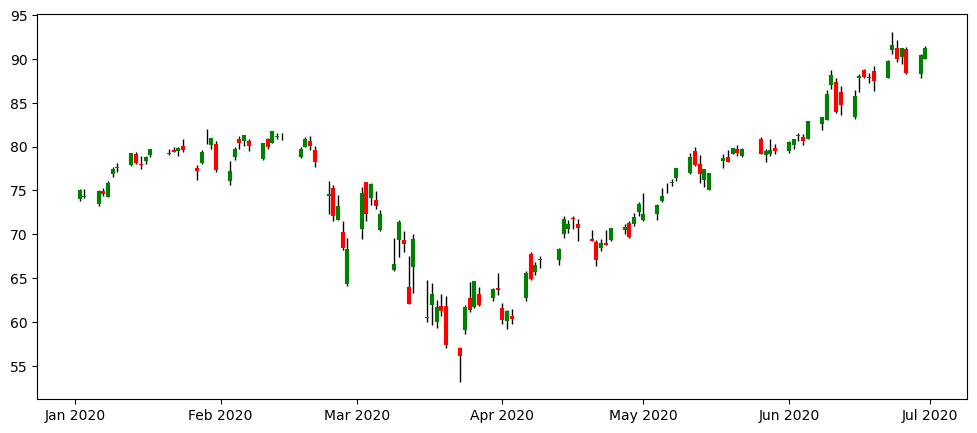

In [ ]:


fig , ax = plt.subplots(figsize=(12, 5))

def candle_stick(df, ax):
    #Wick
    ax.vlines( x = df.index , ymin = df.Low , ymax = df.High , colors = 'k' , linewidth = 1)
    # red = Decrease
    red = df.query('Open > Close')
    ax.vlines(x = red.index , ymin = red.Close , ymax = red.Open , colors = 'r' , linewidth = 3)
    # green = Increase
    green  = df.query('Open < Close')
    ax.vlines(x = green.index , ymin = green.Close , ymax = green.Open, colors = 'g', linewidth = 3)
    ax.xaxis.set_major_locator(dates.MonthLocator())
    ax.xaxis.set_major_formatter(dates.DateFormatter('%b %Y'))
    ax.xaxis.set_minor_locator(dates.MonthLocator())
    return df
    
    
(raw
.iloc[:, ::2]
.pipe(fix_cols)
.resample('d')
.agg({'Open': 'first', 'High' : 'max', 'Low' :'min' , 'Close' :'last'})
.loc['jan 2020' : 'jun 2020']
.pipe(candle_stick , ax)    
)

### Simple challenge for getting the data for sep 2019 to dec 2019

,Open,High,Low,Close
Date,,,,
2019-09-01,NaN,NaN,NaN,NaN
2019-09-02,NaN,NaN,NaN,NaN
2019-09-03,51.607498,51.744999,51.055000,51.424999
2019-09-04,52.097500,52.369999,51.830002,52.297501
2019-09-05,53.000000,53.492500,52.877499,53.320000
...,...,...,...,...
2019-12-27,72.779999,73.492500,72.029999,72.449997
2019-12-28,NaN,NaN,NaN,NaN
2019-12-29,NaN,NaN,NaN,NaN


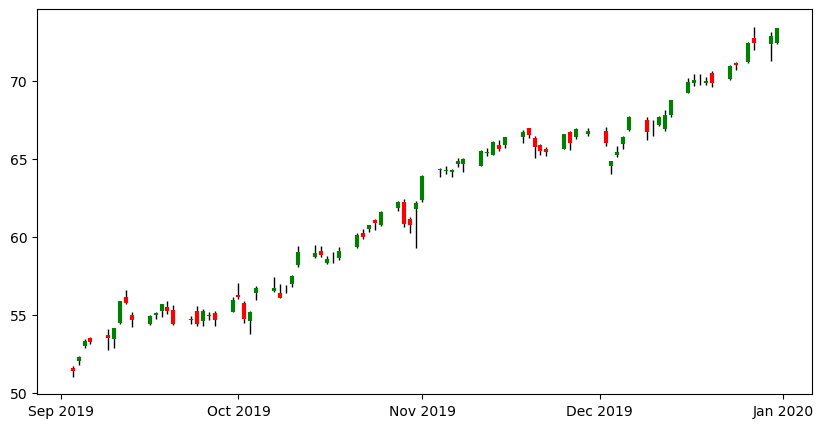

In [ ]:
fig , ax = plt.subplots(figsize=(10, 5))


(raw
.iloc[:, ::2]
.pipe(fix_cols)
.resample('d')
.agg({'Open': 'first', 'High' : 'max', 'Low' :'min' , 'Close' :'last'})
.loc['sep 2019' : 'dec 2019']
.pipe(candle_stick , ax)    
)

## Calculate the returns

In [ ]:



aapl = (raw
        .iloc[:, ::2]
        .pipe(fix_cols)
        )

aapl

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2010-01-04,6.478998,7.643214,7.660714,7.585000,7.622500,493729600
2010-01-05,6.490200,7.656429,7.699643,7.616071,7.664286,601904800
2010-01-06,6.386963,7.534643,7.686786,7.526786,7.656429,552160000
2010-01-07,6.375156,7.520714,7.571429,7.466071,7.562500,477131200
2010-01-08,6.417542,7.570714,7.571429,7.466429,7.510714,447610800
...,...,...,...,...,...,...
2022-12-23,131.127045,131.860001,132.419998,129.639999,130.919998,63814900
2022-12-27,129.307251,130.029999,131.410004,128.720001,131.380005,69007800
2022-12-28,125.339417,126.040001,131.029999,125.870003,129.669998,85438400


In [ ]:
#returns
aapl.pct_change()

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,0.001729,0.001729,0.005082,0.004096,0.005482,0.219098
2010-01-06,-0.015907,-0.015906,-0.001670,-0.011723,-0.001025,-0.082646
2010-01-07,-0.001849,-0.001849,-0.015007,-0.008066,-0.012268,-0.135882
2010-01-08,0.006649,0.006648,0.000000,0.000048,-0.006848,-0.061871
...,...,...,...,...,...,...
2022-12-23,-0.002798,-0.002798,-0.015904,-0.005065,-0.025530,-0.180306
2022-12-27,-0.013878,-0.013878,-0.007627,-0.007097,0.003514,0.081374
2022-12-28,-0.030685,-0.030685,-0.002892,-0.022141,-0.013016,0.238098


In [ ]:
aapl.pct_change? # Documentation for pct_change()

Signature:
aapl.pct_change(
    periods: 'int' = 1,
    fill_method: "Literal['backfill', 'bfill', 'pad', 'ffill'] | None" = 'pad',
    limit=None,
    freq=None,
    **kwargs,
) -> 'NDFrameT'
Docstring:
Percentage change between the current and a prior element.

Computes the percentage change from the immediately previous row by
default. This is useful in comparing the percentage of change in a time
series of elements.

Parameters
----------
periods : int, default 1
    Periods to shift for forming percent change.
fill_method : {'backfill', 'bfill', 'pad', 'ffill', None}, default 'pad'
    How to handle NAs **before** computing percent changes.
limit : int, default None
    The number of consecutive NAs to fill before stopping.
freq : DateOffset, timedelta, or str, optional
    Increment to use from time series API (e.g. 'M' or BDay()).
**kwargs
    Additional keyword arguments are passed into
    `DataFrame.shift` or `Series.shift`.

Returns
-------
Series or DataFrame
    The same t

## Plot the returns

<Axes: xlabel='Date'>

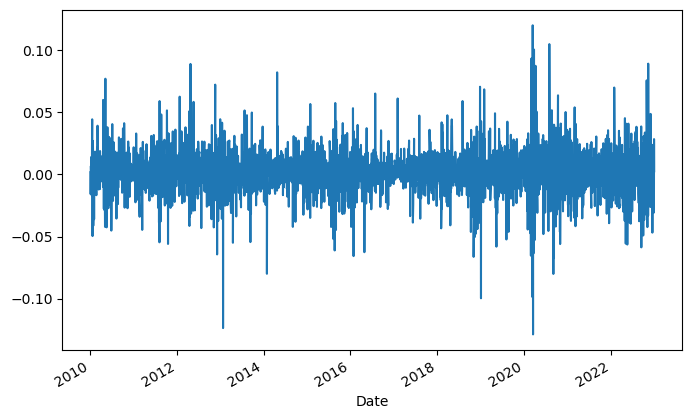

In [ ]:
# plot the returns
(aapl
 .pct_change()
 .Close
 .plot(figsize=(8, 5))
 )

<Axes: >

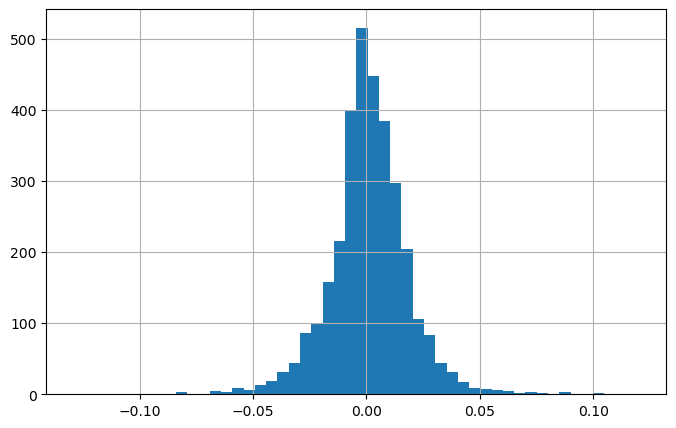

In [ ]:
(aapl
 .pct_change()
 .Close
 .hist(bins = 50, figsize=(8, 5))
 )

### Bar plot returns

<Axes: xlabel='Date'>

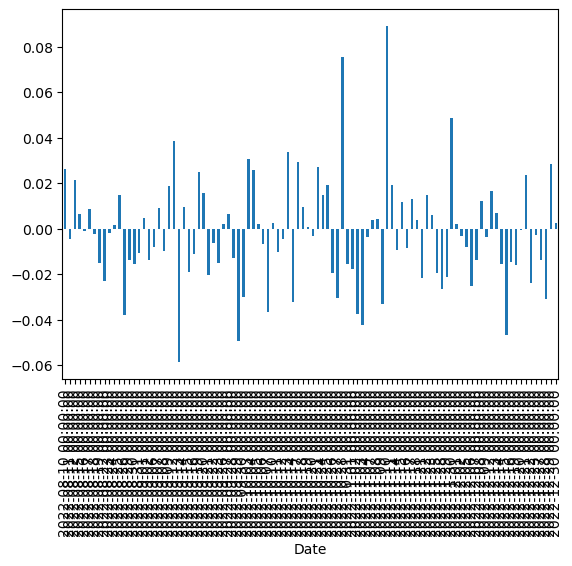

In [ ]:
# Understanding plotting in pandas is a huge lever

(aapl
 .pct_change()
 .Close
 .iloc[-100:]
 .plot.bar()
    
)


### EWW! As you can see, the dates are broken

#### Let's work on that

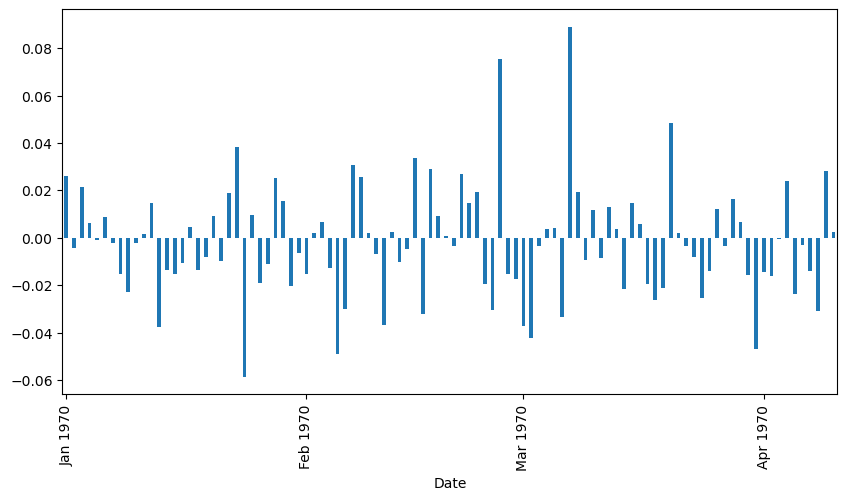

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))

(aapl
 .pct_change()
 .Close
 .iloc[-100:]
 .plot.bar(ax = ax)
    
)

ax.xaxis.set_major_locator(dates.MonthLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter('%b %Y'))
ax.xaxis.set_minor_locator(dates.MonthLocator())

#### Now we face a problem that the dates are not in the same month as the dates  we wanted...
That's because Pandas converted them into the categorical values! <br>
Let's deal this problem using the matplotlib  

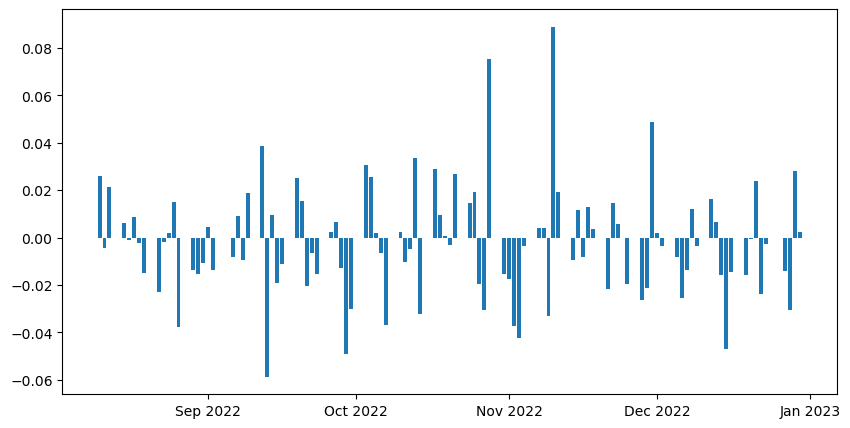

In [ ]:
# use a  function

def my_bar(ser, ax):
    ax.bar(ser.index, ser)
    ax.xaxis.set_major_locator(dates.MonthLocator())
    ax.xaxis.set_major_formatter(dates.DateFormatter('%b %Y'))
    ax.xaxis.set_minor_locator(dates.MonthLocator())
    return ser

fig , ax = plt.subplots(figsize=(10, 5))
a = (
    aapl
    .pct_change()
    .Close
    .iloc[-100:]
    .pipe(my_bar, ax)
)


### Cumulative returns
Cumulative returns is the amount that investments have gained or lost over a given period of time.

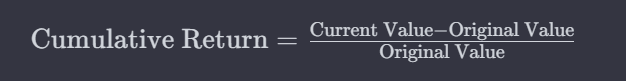
​


<Axes: xlabel='Date'>

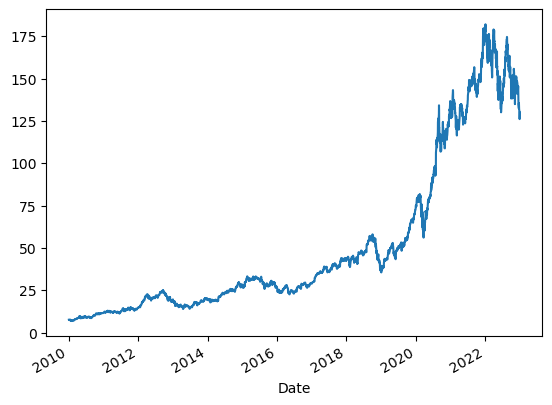

In [ ]:
(aapl
 .Close
 .plot()
)

<Axes: xlabel='Date'>

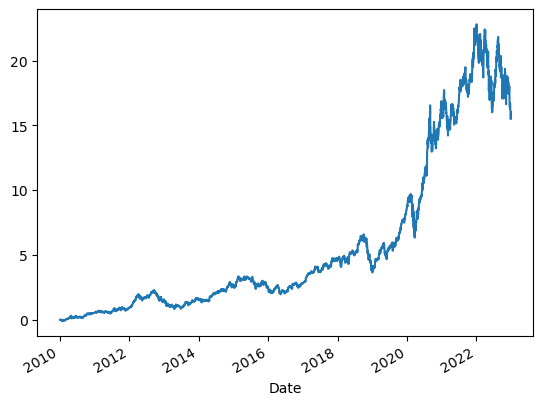

In [ ]:
(aapl
 .Close
 .sub(aapl.Close[0])
 .div(aapl.Close[0])
 .plot()
)

In [ ]:
raw.pipe()?

SyntaxError: invalid syntax (1400171027.py, line 1)